# Lesson 6 - Starter Code

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf

# read in the mammal dataset
wd = '../../assets/dataset/msleep/'
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()

# Part 1:
A look at the mammals dataset

In [2]:
mammals.head()



,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


### Check 1. Distribution

#### A scatter plot of body weight and brain weight

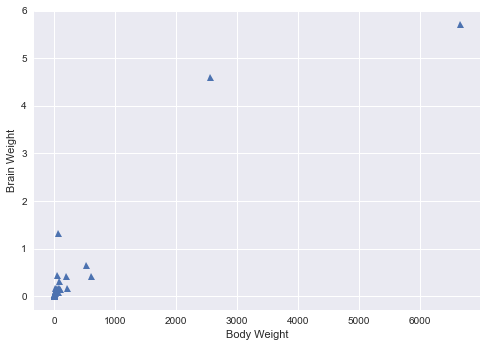

In [3]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '^')
# show the plot
plt.ylabel("Brain Weight")
plt.xlabel("Body Weight")
plt.show()

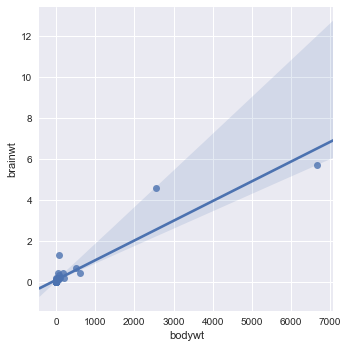

In [5]:
sns.lmplot('bodywt', 'brainwt', mammals)

### Log transformation can help here. 



In [6]:
log_columns = ['bodywt', 'brainwt',]
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)


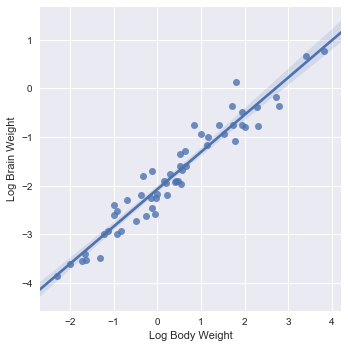

In [7]:
g = sns.lmplot('bodywt', 'brainwt', log_mammals)
g.set_axis_labels( "Log Body Weight", "Log Brain Weight")

#### Woohoo! This looks much better. 

#Part 1-  
Using lmplot and displaying correlations between body weight and two dependent variables: sleep_rem and awake.


With body weight as the x and y set as:
1. sleep_rem 
2. awake

In [13]:
#1. add any additional variables that you would like to take the log of
log_columns = ['bodywt', 'brainwt']  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)



#### Creating the lmplots
Replacing X and Y below with the two variables. 

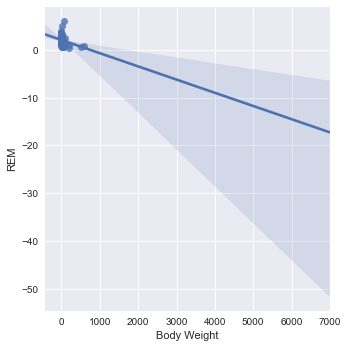

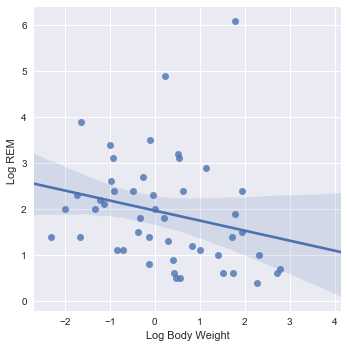

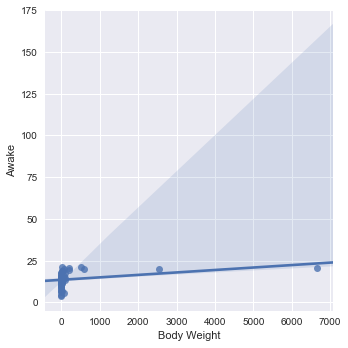

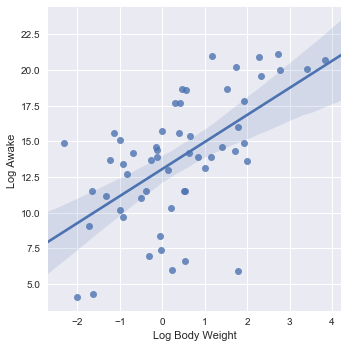

In [9]:
g = sns.lmplot("bodywt", 'sleep_rem', mammals)
g.set_axis_labels( "Body Weight", "REM")
g = sns.lmplot("bodywt", "sleep_rem", log_mammals)
g.set_axis_labels( "Log Body Weight", "Log REM ")

g = sns.lmplot("bodywt", 'awake', mammals)
g.set_axis_labels( "Body Weight", "Awake")
g = sns.lmplot("bodywt", "awake", log_mammals)
g.set_axis_labels( "Log Body Weight", "Log Awake ")

### Trying out other outcomes

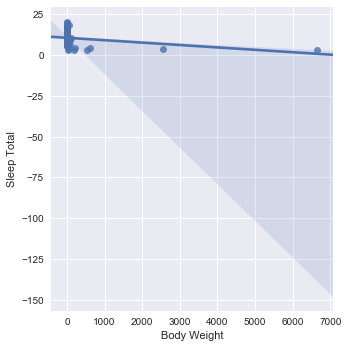

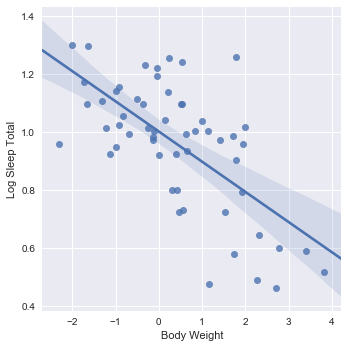

In [10]:
log_columns = ['bodywt', 'sleep_total']  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

x = 'bodywt'
y = 'sleep_total'
d = sns.lmplot(x, y, mammals)
d.set_axis_labels("Body Weight", "Sleep Total")

m = sns.lmplot(x, 'sleep_total', log_mammals)
m.set_axis_labels("Body Weight", "Log Sleep Total")

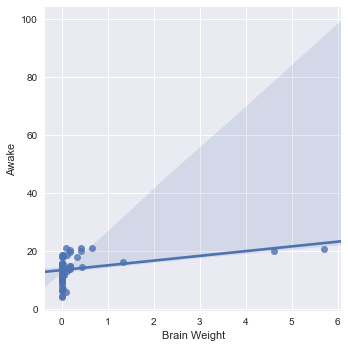

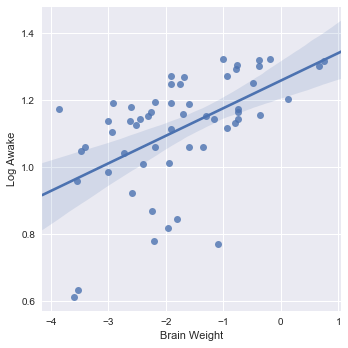

In [11]:
# one other example, using brainwt and awake.
log_columns = ["brainwt", "awake"]
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10) 

x_2 = "brainwt"
y_2 = "awake"
z_1 = sns.lmplot(x_2, y_2, mammals)
z_1.set_axis_labels("Brain Weight", "Awake")

z_2 = sns.lmplot(x_2, y_2, log_mammals)
z_2.set_axis_labels("Brain Weight", "Log Awake")

### Decision for Check 1. Distributrion 
Answer: There is a strong correlation between the body weight of a mammal and it's brain weight.

##### We decided above that we will need a log transformation. Let's take a look at both models to compare

In [12]:
# non-transformed

X = mammals[['bodywt']]
y = mammals['brainwt']

lm = smf.ols(formula='y ~ X', data=mammals).fit()

lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Thu, 31 Aug 2017   Prob (F-statistic):           9.16e-26
Time:                        17:23:40   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080        -0.011     0.183
X              0.0010   5.03e-05     19.176      0.000         0.001     0.001
==============================================================================
Omnibus:                       85.068   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.630
Skew:                           4.258   Prob(JB):                    1.14e-289
Kurtosis:                      25.311   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our output tells us that:

* The relationship between bodywt and brainwt isn't random (p value approaching 0)  
* With this current model, brainwt is roughly bodywt * 0.0010
* The model explains, roughly, 87% of the variance of the dataset 

### Repeated with the log transformation

In [15]:
# Log transformed

X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

lm = smf.ols(formula='y ~ X', data=mammals).fit()

lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     738.4
Date:                Thu, 31 Aug 2017   Prob (F-statistic):           3.56e-33
Time:                        17:24:36   Log-Likelihood:                -8.9817
No. Observations:                  56   AIC:                             21.96
Df Residuals:                      54   BIC:                             26.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.0739      0.040    -51.463      0.000        -2.155    -1.993
X              0.7652      0.028     27.173      0.000         0.709     0.822
==============================================================================
Omnibus:                        4.775   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.060
Skew:                           0.653   Prob(JB):                        0.131
Kurtosis:                       3.193   Cond. No.                         1.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What does our output tell us?

Our output tells us that: 
The relationship between brain weight and body weight is definitely not random.
There is a strong relationship between the two variables (R-squared value of 0.932).
The brain weight is about 0.7652 * body weight.




In [16]:
#Creating a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'X': [500]})
X_new.head()

,X
0,500


Predict X_new

In [17]:
#prediction
lm.predict(X_new)

array([ 380.50695261])

# Part 2: Multiple Regression Analysis using citi bike data 

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.



In [18]:
wd = '../../assets/dataset/bikeshare/'
bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Check 2. Multicollinearity
What is Multicollinearity? 
Multicollinearity is when there is a relationship (positive or negative) between the dependent variable and its independent variables.

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modelling.

# Correlation Heatmap
We create a correlation heat map comparing 'temp', 'atemp', 'casual'

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
Axes(0.125,0.125;0.62x0.755)


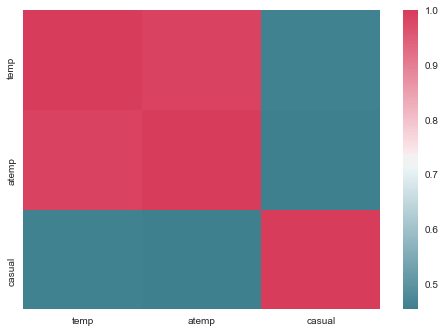

In [19]:
#cmap...
cmap = sns.diverging_palette(215,5, as_cmap = True)
dat = bike_data[["temp", "atemp", "casual"]].corr()
print dat
print sns.heatmap(dat, cmap = cmap)


# Question: What did we find? 
There is a high correlation between the variables "temp" and "atemp," but not so much between both "temp","atemp", versus "casual."

#### The correlation matrix explains: 
The relationship between variables of a dataset. If two variables have a coefficient that is close to zero, then they have no relationship. If the correlation of two variables is close to negative 1 or 1, then the variables have a strong negative and positive relation respectively (negative 1 to 1 relationship or 1 to 1 relationship).


In [24]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo



temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163


/Users/Keshav/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/Keshav/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)



atemp
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661



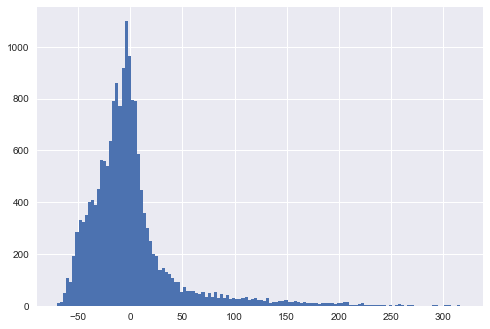

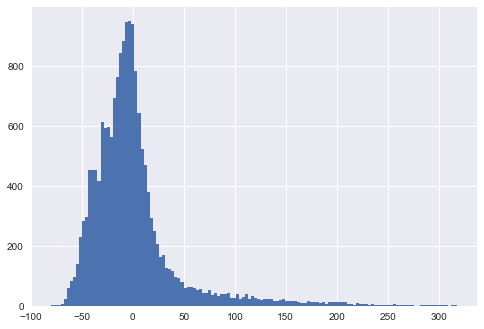

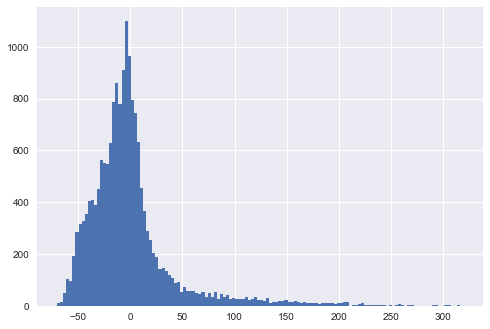

In [25]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

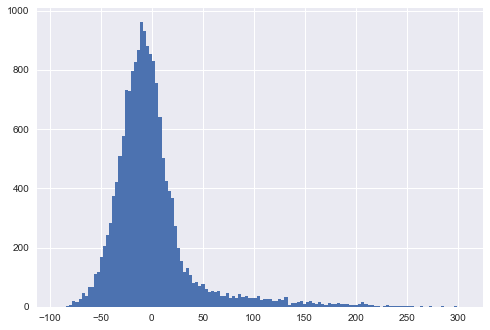

In [26]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())



P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  2.34550988e+13   2.34550988e+13   2.34550988e+13   2.34550988e+13]
y-intercept: -2.34550987861e+13
R-Squared: 0.0233354007662

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666663
R-Squared: 0.0233906873841


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

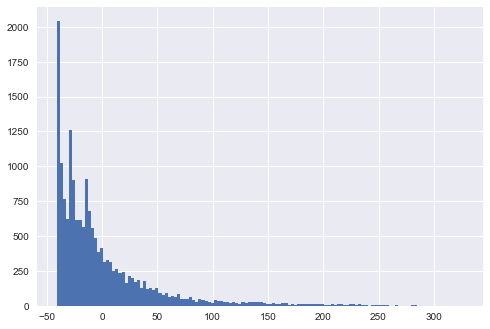

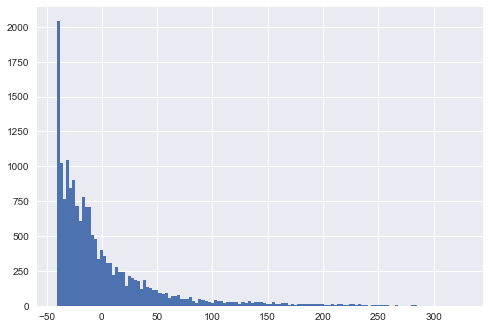

In [27]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)
print
# Set one weather as the reference (drop it), weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)

In [29]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     104.0
Date:                Thu, 31 Aug 2017   Prob (F-statistic):           1.13e-87
Time:                        17:47:30   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                -3.319e+12   5.17e+13     -0.064      0.949     -1.05e+14  9.79e+13
weather[[1, 2, 3, 4]][0]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
weather[[1, 2, 3, 4]][1]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
weather[[1, 2, 3, 4]][2]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
weather[[1, 2, 3, 4]][3]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
==============================================================================
Omnibus:                     8995.399   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58868.810
Skew:                           2.467   Prob(JB):                         0.00
Kurtosis:                      10.547   Cond. No.                     3.88e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Practice: Multicollinearity with dummy variables 



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Showing the effect of dummy variables.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?
A proper measurement of the variables' coefficient value cannot be obtained since there is no reference variable.

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'weather_1',
       u'weather_2', u'weather_3', u'weather_4'],
      dtype='object')
               temp  weather_1  weather_2  weather_3
temp       1.000000   0.101044  -0.069657  -0.062406
weather_1  0.101044   1.000000  -0.822961  -0.412414
weather_2 -0.069657  -0.822961   1.000000  -0.177417
weather_3 -0.062406  -0.412414  -0.177417   1.000000
Axes(0.125,0.125;0.62x0.755)


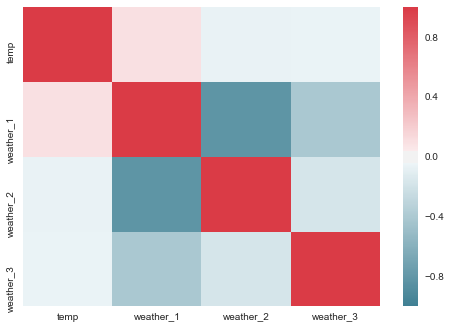

In [31]:
#Dummies example: 
weather = pd.get_dummies(bike_data.weathersit)
#creating new names for the new dummy variables
weather.columns = ['weather_' + str(i) for i in weather.columns]
#joining those new variables back into the larger dataset
bikemodel_data = bike_data.join(weather)
print bikemodel_data.columns

#Select columns to keep. Don't forget to set a reference category for your dummies (aka drop one)
columns_to_keep = ['temp', 'weather_1', 'weather_2', 'weather_3'] #[which_variables?]

#checking for collinearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikemodel_data[columns_to_keep].corr()# what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)



### Now dropping one dummy variable.

In [23]:
#dropping one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 30 Aug 2017   Prob (F-statistic):           8.08e-89
Time:                        16:20:29   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924       -52.478    57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178       -17.274    93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339       -28.235    82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635       -41.814    68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation: 
This model makes more sense, because we can more easily explain the variables compared to the one we left out. 

For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. 

In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. 

However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.




### Checkout our data columns again

In [24]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [25]:
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#Part 3- Building a model to predict guest ridership.
Complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:
- Id categorical variables
- Create dummies (weather situation is done for you in the starter code)
- Find at least two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

List the categorical and continuous variables.
Cat: season, mnth, hr, holiday, weekday, workingday, 

In [32]:
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Independent Practice: Building model to predict guest ridership 


#### Pay attention to:
* Which variables would make sense to dummy (because they are categorical, not continuous)? 
* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and guest riders  
* having a feature space (our matrix) with low multicollinearity  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?
* What features might explain ridership but aren't included in the data set? 

  
If your model has an r-squared above .4, this a relatively effective model for the data available. 

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'weather_1',
       u'weather_2', u'weather_3', u'weather_4'],
      dtype='object')
               temp  weather_1  weather_2  weather_3
temp       1.000000   0.101044  -0.069657  -0.062406
weather_1  0.101044   1.000000  -0.822961  -0.412414
weather_2 -0.069657  -0.822961   1.000000  -0.177417
weather_3 -0.062406  -0.412414  -0.177417   1.000000
Axes(0.125,0.125;0.62x0.755)


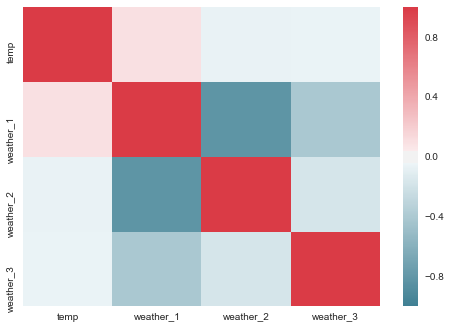

In [33]:
#Dummies example: 
weather = pd.get_dummies(bike_data.weathersit)
#creating new names for our new dummy variables
weather.columns = ['weather_' + str(i) for i in weather.columns]
#joining those new variables back into the larger dataset
bikemodel_data = bike_data.join(weather)
print bikemodel_data.columns

#Select columns to keep. Don't forget to set a reference category for your dummies (aka drop one)
columns_to_keep = ['temp', 'weather_1', 'weather_2', 'weather_3'] #[which_variables?]

#checking for collinearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikemodel_data[columns_to_keep].corr()# what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)





Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'season_1',
       u'season_2', u'season_3', u'season_4'],
      dtype='object')
            casual      temp  season_1  season_2  season_3
casual    1.000000  0.459616 -0.246476  0.123983  0.175067
temp      0.459616  1.000000 -0.583859  0.144363  0.642516
season_1 -0.246476 -0.583859  1.000000 -0.331312 -0.335693
season_2  0.123983  0.144363 -0.331312  1.000000 -0.344433
season_3  0.175067  0.642516 -0.335693 -0.344433  1.000000
Axes(0.125,0.125;0.62x0.755)


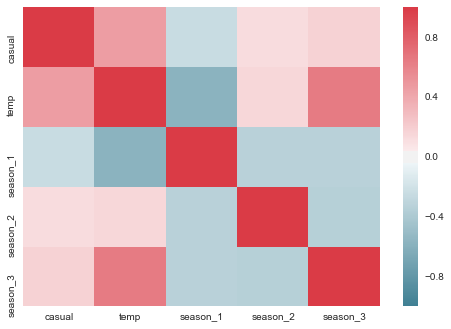

In [124]:
seasonal = pd.get_dummies(bike_data.season)

seasonal.columns = ["season_"+ str(a) for a in seasonal.columns]

bikemodel_data = bike_data.join(seasonal)
print(bikemodel_data.columns)

columns_to_keep_2 = ["casual","temp", "season_1","season_2", "season_3"]

cmap_2 = sns.diverging_palette(220,10,as_cmap = True)
correlations_2 = bikemodel_data[columns_to_keep_2].corr()

print(correlations_2)
print sns.heatmap(correlations_2, cmap = cmap_2)

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'mnth_1', u'mnth_2',
       u'mnth_3', u'mnth_4', u'mnth_5', u'mnth_6', u'mnth_7', u'mnth_8',
       u'mnth_9', u'mnth_10', u'mnth_11', u'mnth_12'],
      dtype='object')
           casual      temp    mnth_1    mnth_2    mnth_3    mnth_4    mnth_5  \
casual   1.000000  0.459616 -0.165430 -0.143796 -0.033971  0.040407  0.092592   
temp     0.459616  1.000000 -0.403142 -0.295510 -0.167659 -0.042047  0.155442   
mnth_1  -0.165430 -0.403142  1.000000 -0.086552 -0.091087 -0.089865 -0.091593   
mnth_2  -0.143796 -0.295510 -0.086552  1.000000 -0.087995 -0.086815 -0.088484   
mnth_3  -0.033971 -0.167659 -0.091087 -0.087995  1.000000 -0.091365 -0.093121   
mnth_4   0.040407 -0.042047 -0.089865 -0.086815 -0.091365  1.000000 -0.091872   
mnth_5   0.092592  0.155442 -0.091593 -0.088484 -0.093

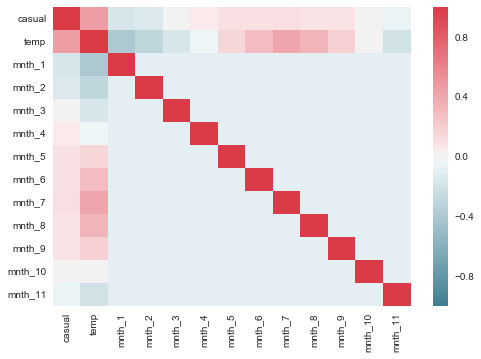

In [34]:
months = pd.get_dummies(bike_data.mnth)
months.columns = ["mnth_" + str(b) for b in months.columns]
bikemodel_data = bike_data.join(months)
print(bikemodel_data.columns)

columns_to_keep_3 = ["casual","temp","mnth_1", "mnth_2", "mnth_3", "mnth_4", "mnth_5", "mnth_6", "mnth_7", "mnth_8", "mnth_9", "mnth_10", "mnth_11"]

cmap_3 = sns.diverging_palette(220,10, as_cmap = True)
correlations_3 = bikemodel_data[columns_to_keep_3].corr()

print(correlations_3)
print sns.heatmap(correlations_3,cmap = cmap_3)

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'hr_0', u'hr_1',
       u'hr_2', u'hr_3', u'hr_4', u'hr_5', u'hr_6', u'hr_7', u'hr_8', u'hr_9',
       u'hr_10', u'hr_11', u'hr_12', u'hr_13', u'hr_14', u'hr_15', u'hr_16',
       u'hr_17', u'hr_18', u'hr_19', u'hr_20', u'hr_21', u'hr_22', u'hr_23'],
      dtype='object')
          casual      temp      hr_0      hr_1      hr_2      hr_4      hr_5  \
casual  1.000000  0.459616 -0.108065 -0.123363 -0.129838 -0.142710 -0.144167   
temp    0.459616  1.000000 -0.032072 -0.040738 -0.045627 -0.053459 -0.065571   
hr_0   -0.108065 -0.032072  1.000000 -0.043533 -0.043250 -0.042679 -0.043313   
hr_1   -0.123363 -0.040738 -0.043533  1.000000 -0.043188 -0.042618 -0.043251   
hr_2   -0.129838 -0.045627 -0.043250 -0.043188  1.000000 -0.042340 -0.042969   
hr_4   -0.142710 -0.053459 -0.042679 -0

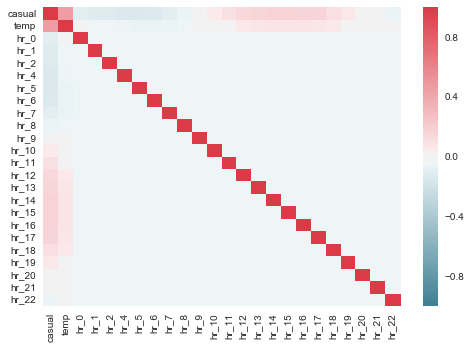

In [35]:
hour = pd.get_dummies(bike_data.hr)
hour.columns = ["hr_"+ str(c) for c in hour.columns]
bikemodel_data = bike_data.join(hour)

print(bikemodel_data.columns)

columns_to_keep_4 = ["casual","temp", "hr_0", "hr_1", "hr_2", "hr_4", "hr_5", "hr_6", "hr_7", "hr_8", "hr_9", "hr_10", "hr_11", "hr_12", "hr_13", "hr_14", "hr_15", "hr_16", "hr_17", "hr_18", "hr_19", "hr_20", "hr_21", "hr_22"]

cmap_4 = sns.diverging_palette(220, 10, as_cmap = True)
correlations_4 = bikemodel_data[columns_to_keep_4].corr()
 
print(correlations_4)
print sns.heatmap(correlations_4, cmap = cmap_4)
                                

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'holiday_0',
       u'holiday_1'],
      dtype='object')
             casual      temp  holiday_0
casual     1.000000  0.459616  -0.031564
temp       0.459616  1.000000   0.027340
holiday_0 -0.031564  0.027340   1.000000
Axes(0.125,0.125;0.62x0.755)


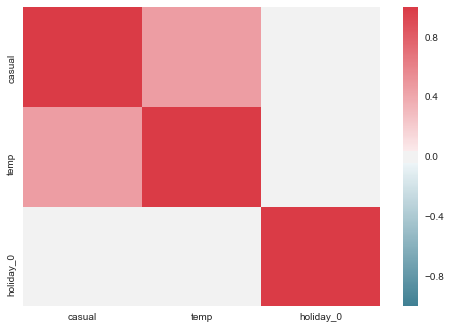

In [36]:
holidays = pd.get_dummies(bike_data.holiday)
holidays.columns = ["holiday_"+ str(c) for c in holidays.columns]

bikemodel_data = bike_data.join(holidays)

print(bikemodel_data.columns)

columns_to_keep_5 = ["casual","temp", "holiday_0"]
cmap_5 = sns.diverging_palette(220,10, as_cmap = True)

correlations_5 = bikemodel_data[columns_to_keep_5].corr()

print(correlations_5)
print sns.heatmap(correlations_5, cmap = cmap_5)



Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'weekday_0',
       u'weekday_1', u'weekday_2', u'weekday_3', u'weekday_4', u'weekday_5',
       u'weekday_6'],
      dtype='object')
             casual      temp  weekday_6  weekday_1  weekday_2  weekday_3  \
casual     1.000000  0.459616   0.213187  -0.058927  -0.099456  -0.103457   
temp       0.459616  1.000000  -0.032321  -0.004111   0.024384   0.020502   
weekday_6  0.213187 -0.032321   1.000000  -0.167665  -0.166638  -0.167508   
weekday_1 -0.058927 -0.004111  -0.167665   1.000000  -0.165357  -0.166219   
weekday_2 -0.099456  0.024384  -0.166638  -0.165357   1.000000  -0.165201   
weekday_3 -0.103457  0.020502  -0.167508  -0.166219  -0.165201   1.000000   
weekday_4 -0.089211  0.021208  -0.167350  -0.166063  -0.165046  -0.165906   
weekday_5 -0.034957 -0.001184  -0.167981  

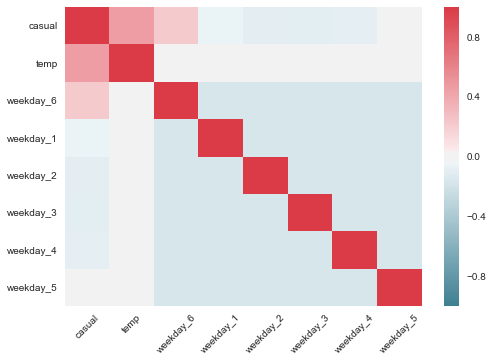

In [37]:
weekdays = pd.get_dummies(bike_data.weekday)
weekdays.columns = ["weekday_" + str(d) for d in weekdays.columns]

bikemodel_data = bike_data.join(weekdays)
print(bikemodel_data.columns)

columns_to_keep_6 = ["casual","temp", "weekday_6", "weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5"]

cmap_6 = sns.diverging_palette(220,10, as_cmap = True)
correlations_6 = bikemodel_data[columns_to_keep_6].corr()

print correlations_6

m = sns.heatmap(correlations_6, cmap = cmap_6)
print m
for item in m.get_xticklabels():
    item.set_rotation(45)


Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'workingday_0',
       u'workingday_1'],
      dtype='object')
                casual      temp  workingday_1
casual        1.000000  0.459616     -0.300942
temp          0.459616  1.000000      0.055390
workingday_1 -0.300942  0.055390      1.000000
Axes(0.125,0.125;0.62x0.755)


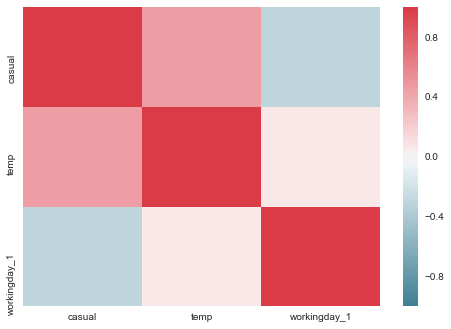

In [38]:
workday = pd.get_dummies(bike_data.workingday)
workday.columns = ["workingday_"+ str(e) for e in workday.columns]

bikemodel_data = bike_data.join(workday)

print(bikemodel_data.columns)

cmap_7 = sns.diverging_palette(220,10, as_cmap = True)

columns_to_keep_7 = ["casual","temp", "workingday_1"]

correlations_7 = bikemodel_data[columns_to_keep_7].corr()

print(correlations_7)
print sns.heatmap(correlations_7, cmap = cmap_7)



####1: What's the strongest predictor? 

Answer: The strongest predictor of casual ridership is the temperature. The temperature has the strongest correlation with the casual ridership variable.

####2: How well did your model do? 

Answer: The model did not do so well in terms of its r-squared value.

####3: How can you improve it? 

Answer: The model can be improved by taking the log of the dependent variable versus the variables.

In [39]:
log_dep_var = bike_data["casual"]
log_dep_var2 = np.log10(log_dep_var+1)
rel_stat = smf.ols(formula = "log_dep_var2 ~ temp + weather[[1,2,3]] + months[[1,2,3,4,5,6,7,8,9,11]] + hour[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]", data=bike_data).fit()
rel_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_dep_var2   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1504.
Date:                Thu, 31 Aug 2017   Prob (F-statistic):               0.00
Time:                        17:54:33   Log-Likelihood:                -4789.2
No. Observations:               17379   AIC:                             9652.
Df Residuals:                   17342   BIC:                             9940.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================================
                                                                                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                     0.3189      0.013     25.075      0.000         0.294     0.344
temp                                                                                          1.2778      0.027     46.503      0.000         1.224     1.332
weather[[1, 2, 3]][0]                                                                        -0.0663      0.006    -11.694      0.000        -0.077    -0.055
weather[[1, 2, 3]][1]                                                                        -0.3712      0.009    -41.025      0.000        -0.389    -0.353
weather[[1, 2, 3]][2]                                                                        -0.3847      0.184     -2.085      0.037        -0.746    -0.023
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][0]                                                   -0.0903      0.011     -8.552      0.000        -0.111    -0.070
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][1]                                                    0.1212      0.011     11.531      0.000         0.101     0.142
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][2]                                                    0.1780      0.011     15.757      0.000         0.156     0.200
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][3]                                                    0.1744      0.013     13.436      0.000         0.149     0.200
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][4]                                                    0.0693      0.015      4.716      0.000         0.040     0.098
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][5]                                                    0.0114      0.016      0.707      0.479        -0.020     0.043
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][6]                                                    0.0228      0.015      1.510      0.131        -0.007     0.052
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][7]                                                    0.1108      0.013      8.237      0.000         0.084     0.137
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][8]                                                    0.1842      0.011     16.055      0.000         0.162     0.207
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][9]                                                    0.0050      0.010      0.486      0.627        -0.015     0.025
hour[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]][0]     -0.2602      0.015    -17.922      0.000        -0.289    -0.232
hour[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 

###Bonus:
    
We've completed a model that explains casual guest riders. Build another model, using a different y (outcome) variable: registered riders.

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'season_1',
       u'season_2', u'season_3', u'season_4'],
      dtype='object')
            registered      temp  season_1  season_2  season_3
registered    1.000000  0.335361 -0.213866  0.032345  0.124675
temp          0.335361  1.000000 -0.583859  0.144363  0.642516
season_1     -0.213866 -0.583859  1.000000 -0.331312 -0.335693
season_2      0.032345  0.144363 -0.331312  1.000000 -0.344433
season_3      0.124675  0.642516 -0.335693 -0.344433  1.000000
Axes(0.125,0.125;0.62x0.755)


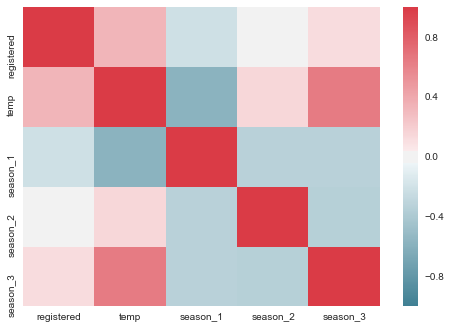

In [40]:
seasonal = pd.get_dummies(bike_data.season)

seasonal.columns = ["season_"+ str(a) for a in seasonal.columns]

bikemodel_data = bike_data.join(seasonal)
print(bikemodel_data.columns)

columns_to_keep_2 = ["registered","temp", "season_1","season_2", "season_3"]

cmap_2 = sns.diverging_palette(220,10,as_cmap = True)
correlations_2 = bikemodel_data[columns_to_keep_2].corr()

print(correlations_2)
print sns.heatmap(correlations_2, cmap = cmap_2)

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'mnth_1', u'mnth_2',
       u'mnth_3', u'mnth_4', u'mnth_5', u'mnth_6', u'mnth_7', u'mnth_8',
       u'mnth_9', u'mnth_10', u'mnth_11', u'mnth_12'],
      dtype='object')
            registered      temp    mnth_1    mnth_2    mnth_3    mnth_4  \
registered    1.000000  0.335361 -0.134061 -0.099499 -0.057400 -0.017531   
temp          0.335361  1.000000 -0.403142 -0.295510 -0.167659 -0.042047   
mnth_1       -0.134061 -0.403142  1.000000 -0.086552 -0.091087 -0.089865   
mnth_2       -0.099499 -0.295510 -0.086552  1.000000 -0.087995 -0.086815   
mnth_3       -0.057400 -0.167659 -0.091087 -0.087995  1.000000 -0.091365   
mnth_4       -0.017531 -0.042047 -0.089865 -0.086815 -0.091365  1.000000   
mnth_5        0.037455  0.155442 -0.091593 -0.088484 -0.093121 -0.091872   
mnth_6       

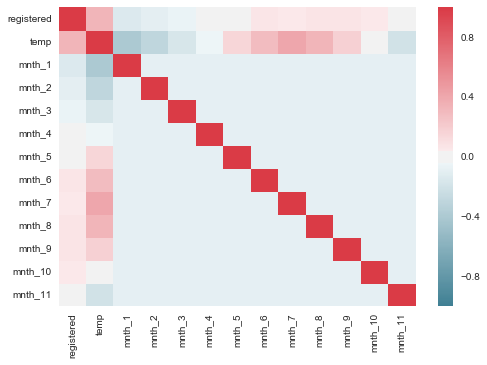

In [41]:
months = pd.get_dummies(bike_data.mnth)
months.columns = ["mnth_" + str(b) for b in months.columns]
bikemodel_data = bike_data.join(months)
print(bikemodel_data.columns)

columns_to_keep_3 = ["registered","temp","mnth_1", "mnth_2", "mnth_3", "mnth_4", "mnth_5", "mnth_6", "mnth_7", "mnth_8", "mnth_9", "mnth_10", "mnth_11"]

cmap_3 = sns.diverging_palette(220,10, as_cmap = True)
correlations_3 = bikemodel_data[columns_to_keep_3].corr()

print(correlations_3)
print sns.heatmap(correlations_3,cmap = cmap_3)

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'hr_0', u'hr_1',
       u'hr_2', u'hr_3', u'hr_4', u'hr_5', u'hr_6', u'hr_7', u'hr_8', u'hr_9',
       u'hr_10', u'hr_11', u'hr_12', u'hr_13', u'hr_14', u'hr_15', u'hr_16',
       u'hr_17', u'hr_18', u'hr_19', u'hr_20', u'hr_21', u'hr_22', u'hr_23'],
      dtype='object')
            registered      temp      hr_0      hr_1      hr_2      hr_4  \
registered    1.000000  0.335361 -0.151813 -0.174832 -0.185702 -0.200806   
temp          0.335361  1.000000 -0.032072 -0.040738 -0.045627 -0.053459   
hr_0         -0.151813 -0.032072  1.000000 -0.043533 -0.043250 -0.042679   
hr_1         -0.174832 -0.040738 -0.043533  1.000000 -0.043188 -0.042618   
hr_2         -0.185702 -0.045627 -0.043250 -0.043188  1.000000 -0.042340   
hr_4         -0.200806 -0.053459 -0.042679 -0.042618 -0.042340 

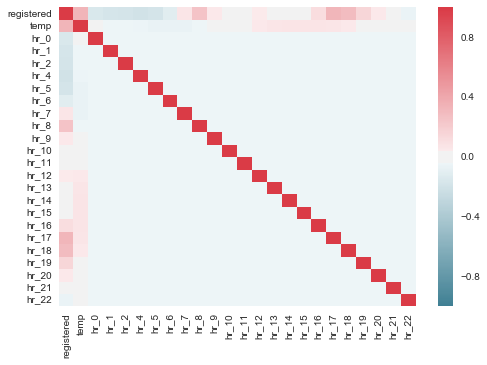

In [42]:
hour = pd.get_dummies(bike_data.hr)
hour.columns = ["hr_"+ str(c) for c in hour.columns]
bikemodel_data = bike_data.join(hour)

print(bikemodel_data.columns)

columns_to_keep_4 = ["registered","temp", "hr_0", "hr_1", "hr_2", "hr_4", "hr_5", "hr_6", "hr_7", "hr_8", "hr_9", "hr_10", "hr_11", "hr_12", "hr_13", "hr_14", "hr_15", "hr_16", "hr_17", "hr_18", "hr_19", "hr_20", "hr_21", "hr_22"]

cmap_4 = sns.diverging_palette(220, 10, as_cmap = True)
correlations_4 = bikemodel_data[columns_to_keep_4].corr()
 
print(correlations_4)
print sns.heatmap(correlations_4, cmap = cmap_4)
                                

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'holiday_0',
       u'holiday_1'],
      dtype='object')
            registered      temp  holiday_0
registered    1.000000  0.335361   0.047345
temp          0.335361  1.000000   0.027340
holiday_0     0.047345  0.027340   1.000000
Axes(0.125,0.125;0.62x0.755)


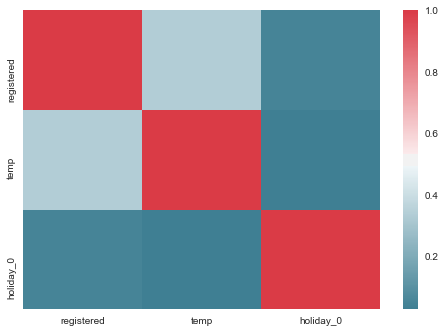

In [43]:
holidays = pd.get_dummies(bike_data.holiday)
holidays.columns = ["holiday_"+ str(c) for c in holidays.columns]

bikemodel_data = bike_data.join(holidays)

print(bikemodel_data.columns)

columns_to_keep_5 = ["registered","temp", "holiday_0"]
cmap_5 = sns.diverging_palette(220,10, as_cmap = True)

correlations_5 = bikemodel_data[columns_to_keep_5].corr()

print(correlations_5)
print sns.heatmap(correlations_5, cmap = cmap_5)



Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'weekday_0',
       u'weekday_1', u'weekday_2', u'weekday_3', u'weekday_4', u'weekday_5',
       u'weekday_6'],
      dtype='object')
            registered      temp  weekday_6  weekday_1  weekday_2  weekday_3  \
registered    1.000000  0.335361  -0.067418   0.003785   0.037154   0.038191   
temp          0.335361  1.000000  -0.032321  -0.004111   0.024384   0.020502   
weekday_6    -0.067418 -0.032321   1.000000  -0.167665  -0.166638  -0.167508   
weekday_1     0.003785 -0.004111  -0.167665   1.000000  -0.165357  -0.166219   
weekday_2     0.037154  0.024384  -0.166638  -0.165357   1.000000  -0.165201   
weekday_3     0.038191  0.020502  -0.167508  -0.166219  -0.165201   1.000000   
weekday_4     0.047819  0.021208  -0.167350  -0.166063  -0.165046  -0.165906   
weekday_5     0.02

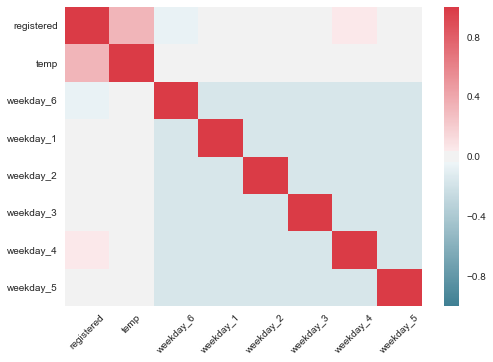

In [44]:
weekdays = pd.get_dummies(bike_data.weekday)
weekdays.columns = ["weekday_" + str(d) for d in weekdays.columns]

bikemodel_data = bike_data.join(weekdays)
print(bikemodel_data.columns)

columns_to_keep_6 = ["registered","temp", "weekday_6", "weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5"]

cmap_6 = sns.diverging_palette(220,10, as_cmap = True)
correlations_6 = bikemodel_data[columns_to_keep_6].corr()

print correlations_6

m = sns.heatmap(correlations_6, cmap = cmap_6)
print m
for item in m.get_xticklabels():
    item.set_rotation(45)



Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'workingday_0',
       u'workingday_1'],
      dtype='object')
              registered      temp  workingday_1
registered      1.000000  0.335361      0.134326
temp            0.335361  1.000000      0.055390
workingday_1    0.134326  0.055390      1.000000
Axes(0.125,0.125;0.62x0.755)


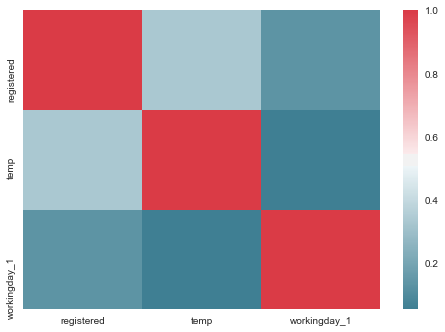

In [45]:
workday = pd.get_dummies(bike_data.workingday)
workday.columns = ["workingday_"+ str(e) for e in workday.columns]

bikemodel_data = bike_data.join(workday)

print(bikemodel_data.columns)

cmap_7 = sns.diverging_palette(220,10, as_cmap = True)

columns_to_keep_7 = ["registered","temp", "workingday_1"]

correlations_7 = bikemodel_data[columns_to_keep_7].corr()

print(correlations_7)
print sns.heatmap(correlations_7, cmap = cmap_7)




Bonus 1: What's the strongest predictor? 

The strongest predictor for registered riders is the temperature.

Bonus 2: How well did your model do? 

In [138]:
rel_stat = smf.ols(formula = "registered ~ temp + weather[[1,2,3]] + months[[1,2,3,4,5,6,7,8,9,11]] + hour[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]", data=bike_data).fit()
rel_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     705.7
Date:                Thu, 31 Aug 2017   Prob (F-statistic):               0.00
Time:                        00:32:37   Log-Likelihood:            -1.0406e+05
No. Observations:               17379   AIC:                         2.082e+05
Df Residuals:                   17342   BIC:                         2.085e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================================
                                                                                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                   -35.6456      3.846     -9.268      0.000       -43.185   -28.107
temp                                                                                        238.1588      8.310     28.658      0.000       221.870   254.448
weather[[1, 2, 3]][0]                                                                       -11.2788      1.714     -6.582      0.000       -14.637    -7.920
weather[[1, 2, 3]][1]                                                                       -67.3837      2.737    -24.622      0.000       -72.748   -62.019
weather[[1, 2, 3]][2]                                                                       -77.0308     55.795     -1.381      0.167      -186.395    32.333
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][0]                                                  -15.9712      3.195     -4.999      0.000       -22.233    -9.709
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][1]                                                  -13.2450      3.179     -4.166      0.000       -19.477    -7.013
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][2]                                                  -11.0256      3.417     -3.227      0.001       -17.724    -4.328
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][3]                                                  -13.1619      3.926     -3.352      0.001       -20.858    -5.466
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][4]                                                  -21.5421      4.445     -4.846      0.000       -30.255   -12.829
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][5]                                                  -49.2271      4.864    -10.120      0.000       -58.762   -39.693
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][6]                                                  -26.9764      4.575     -5.897      0.000       -35.944   -18.009
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][7]                                                    1.4160      4.068      0.348      0.728        -6.558     9.390
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][8]                                                   22.0531      3.470      6.355      0.000        15.251    28.855
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][9]                                                    6.5839      3.096      2.127      0.033         0.516    12.652
hour[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]][0]    -28.7864      4.391     -6.555      0.000       -37.394   -20.179
hour[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 

The model has an r-squared above 0.4 (0.594) so it is at the level: "good". 

Bonus 3: How can you improve it? 

The model can also be improved by taking the log of the "registered" dependent variable and using it in the linear model equation instead. 

In [46]:
log_dep_var3 = bike_data["registered"]
log_dep_var4 = np.log10(log_dep_var3+1)
rel_stat = smf.ols(formula = "log_dep_var4 ~ temp + weather[[1,2,3]] + months[[1,2,3,4,5,6,7,8,9,11]] + hour[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]", data=bike_data).fit()
rel_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_dep_var4   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     1588.
Date:                Thu, 31 Aug 2017   Prob (F-statistic):               0.00
Time:                        17:55:47   Log-Likelihood:                -3323.0
No. Observations:               17379   AIC:                             6720.
Df Residuals:                   17342   BIC:                             7007.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================================
                                                                                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                     1.3402      0.012    114.666      0.000         1.317     1.363
temp                                                                                          0.7955      0.025     31.498      0.000         0.746     0.845
weather[[1, 2, 3]][0]                                                                        -0.0239      0.005     -4.580      0.000        -0.034    -0.014
weather[[1, 2, 3]][1]                                                                        -0.2617      0.008    -31.467      0.000        -0.278    -0.245
weather[[1, 2, 3]][2]                                                                        -0.1010      0.170     -0.596      0.551        -0.433     0.231
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][0]                                                   -0.0566      0.010     -5.835      0.000        -0.076    -0.038
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][1]                                                   -0.0621      0.010     -6.430      0.000        -0.081    -0.043
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][2]                                                   -0.0335      0.010     -3.229      0.001        -0.054    -0.013
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][3]                                                   -0.0190      0.012     -1.596      0.110        -0.042     0.004
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][4]                                                   -0.0499      0.014     -3.697      0.000        -0.076    -0.023
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][5]                                                   -0.1266      0.015     -8.568      0.000        -0.156    -0.098
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][6]                                                   -0.0789      0.014     -5.679      0.000        -0.106    -0.052
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][7]                                                    0.0020      0.012      0.162      0.872        -0.022     0.026
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][8]                                                    0.0788      0.011      7.472      0.000         0.058     0.099
months[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]][9]                                                    0.0262      0.009      2.787      0.005         0.008     0.045
hour[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]][0]     -0.3922      0.013    -29.391      0.000        -0.418    -0.366
hour[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 